<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Análise de Segurança Pública no Brasil </font>

## <font color ="#00b8ff">1 Primeira Etapa : Junção dos Datasets </font>
  Veja como diferentes datasets (de diferentes anos) se comportam e como podemos juntar todos eles em uma só tabela.

  Os dados vão ser encontrados aqui: https://www.kaggle.com/datasets/inquisitivecrow/crime-data-in-brazil

  Dica: se possível, veja uma maneira de carregar uma grande quantidade de dados de forma mais rápida ( caso o pandas não aguente ou demore )

  A função abaixo é responsável por trazer um dado pesado do drive, só é necessário trocar o id de compartilhamento do arquivo:


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eRvEYGVrz811Hy0cOrMjCwF-Lc7gPE5X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1eRvEYGVrz811Hy0cOrMjCwF-Lc7gPE5X" -O crime-data-in-brazil.parquet && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eRvEYGVrz811Hy0cOrMjCwF-Lc7gPE5X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10mihMEeKaMFizM9Z2NRtDwGOAF_HZ8ZI" -O cidades.parquet && rm -rf /tmp/cookies.txt

--2023-12-11 21:24:53--  https://docs.google.com/uc?export=download&confirm=t&id=1eRvEYGVrz811Hy0cOrMjCwF-Lc7gPE5X
Resolving docs.google.com (docs.google.com)... 108.177.13.138, 108.177.13.102, 108.177.13.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k941lhcn1go25fphjhated62p6rj6dol/1702329825000/15769217210781797530/*/1eRvEYGVrz811Hy0cOrMjCwF-Lc7gPE5X?e=download&uuid=43ebfc80-1805-4c5b-aa37-f966057232ed [following]
--2023-12-11 21:24:53--  https://doc-04-0k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k941lhcn1go25fphjhated62p6rj6dol/1702329825000/15769217210781797530/*/1eRvEYGVrz811Hy0cOrMjCwF-Lc7gPE5X?e=download&uuid=43ebfc80-1805-4c5b-aa37-f966057232ed
Resolving doc-04-0k-docs.googleusercontent.com (doc-04-0k-docs.googleusercontent.com)... 173.194.218.132,

In [ ]:
import pandas as pd
import numpy as np
from plotly.graph_objs import Marker
import plotly.express as px
import matplotlib.pyplot as plt
import re
import gc

## <font color ="#00b8ff">Introdução</font>

### Sobre o que é esse dataset:

Este conjunto de dados contém informações estruturadas sobre todas as ocorrências criminais atendidas pela Polícia Militar (PM), a principal força policial de São Paulo. No entanto, o conjunto de dados não é completo, pois algumas cidades da Grande São Paulo demoraram a coletar todos os dados. Além disso, o conjunto de dados não contém o histórico completo de cada boletim de ocorrência, pois isso violaria a privacidade das pessoas envolvidas.

### Explicar por que ele foi escolhido:

A escolha de um dataset adequado é fundamental para o sucesso de um projeto de ciência de dados. No nosso caso, escolhemos um dataset que atendesse a dois critérios principais: riqueza de dados e relevância do tema.

> Riqueza de dados

O dataset escolhido é composto por um grande número de registros, o que nos permite realizar análises mais abrangentes. Além disso, os dados são bem distribuídos, o que evita que as análises sejam enviesadas.

> Relevância do tema

O tema do dataset é relevante para o nosso projeto, que visa melhorar a segurança pública. Os dados incluem informações sobre crimes, ocorrências policiais e outros eventos relevantes para a segurança pública. Isso nos permite realizar análises que podem ajudar a identificar padrões e tendências que podem contribuir para a melhoria da segurança pública.

### O que será realizado nele:

>Limpeza de dados

Inicialmente, verificamos se os dados estavam completos e corretos. Identificamos alguns problemas, como datas inválidas, idades erradas, dados ausentes, etc. Corrigimos esses problemas para garantir que os dados fossem confiáveis.

>Análise de dados

Em seguida, analisamos os dados para identificar padrões e tendências. Descobrimos qual o tipo mais comum de crimes, que a maioria dos crimes ocorre durante a noite, etc

>Visualizações de dados

Para comunicar os resultados da análise de dados, criamos algumas visualizações, como gráficos de linha, histogramas, barras empilhadas, etc. Essas visualizações ajudaram a visualizar os dados e a identificar padrões e tendências de forma mais clara.


### Quem somos:
> A TAIL (Technology and Artificial Intelligence League) é a primeira Liga Acadêmica de Inteligência Artificial da Paraíba e a primeira Liga Acadêmica do Centro de Informática (CI). Fundada no dia 7 de agosto de 2020, a TAIL é estruturada para o desenvolvimento profissional e pessoal dos integrantes. Temos como objetivo promover um ambiente para troca de conhecimentos em áreas como inteligência artificial, ciência de dados, cálculo e estatística, bem como estimular e divulgar estudos científicos, publicações e cursos. Nosso corpo de membros é composto por professores doutores, mestrandos e alunos de graduação.

#### Diretoria de trainees:
> A diretoria de trainees é responsável por dar as boas-vindas a membros recém-iniciados no universo da IA. Durante toda a rotação, os trainees recebem aulas e orientações de outros membros, a fim de crescerem e aprenderem sobre as diversas tecnologias usuais para a manipulação de dados e treinamento de modelos.

> Membros:
- Frankley Kaiky (Diretor)
- Jonas Felipe (Lider)
- Allejandro Sousa
- Ana Luísa
- Camila Eduardo
- Kaio Barreto
- Maria da Penha
- Matheus Felipe
- Rodrigo Veríssimo


In [ ]:
dataframe = pd.read_parquet('crime-data-in-brazil.parquet')

In [ ]:
dataframe.head(10)

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,DATA_OCORRENCIA_BO,...,DESCR_GRAU_INSTRUCAO,NOME_DELEGACIA,NOME_MUNICIPIO_CIRC,DESCR_TIPO_BO,DESCR_CONDUTA,DESCR_TIPOLOCAL,DESCR_SUBTIPOLOCAL,FLAG_VITIMA_FATAL,COR_CUTIS,DATA_OCORRENCIA
0,6725,2007,10307,DECAP,DEL.SEC.3º OESTE,07º D.P. LAPA,DECAP,DEL.SEC.3º OESTE,07º D.P. LAPA,02/07/2007,...,1 Grau incompleto,None,None,None,None,None,None,None,None,2007-07-01
1,2812,2007,20250,DECAP,DEL.SEC.7º ITAQUERA,50º D.P. ITAIM PAULISTA,DECAP,DEL.SEC.7º ITAQUERA,50º D.P. ITAIM PAULISTA,06/05/2007,...,None,None,None,None,None,None,None,None,None,2007-05-01
2,3465,2007,20139,DECAP,DEL.SEC.4º NORTE,39º D.P. VILA GUSTAVO,DECAP,DEL.SEC.4º NORTE,39º D.P. VILA GUSTAVO,02/06/2007,...,1 Grau incompleto,None,None,None,None,None,None,None,None,2007-06-01
3,4689,2007,10362,DECAP,DEL.SEC.8º SAO MATEUS,69º D.P. TEOTONIO VILELA,DECAP,DEL.SEC.8º SAO MATEUS,69º D.P. TEOTONIO VILELA,10/10/2007,...,Superior completo,None,None,None,None,None,None,None,None,2007-10-01
4,5429,2007,20222,DECAP,DEL.SEC.7º ITAQUERA,22º D.P. SAO MIGUEL PTA,DECAP,DEL.SEC.7º ITAQUERA,22º D.P. SAO MIGUEL PTA,12/09/2007,...,2 Grau completo,None,None,None,None,None,None,None,None,2007-09-01
5,2729,2007,10375,DECAP,DEL.SEC.6º SANTO AMARO,102º D.P. SOCORRO,DECAP,DEL.SEC.6º SANTO AMARO,102º D.P. SOCORRO,27/06/2007,...,None,None,None,None,None,None,None,None,None,2007-06-01
6,6045,2007,20119,DECAP,DEL.SEC.4º NORTE,19º D.P. VILA MARIA,DECAP,DEL.SEC.4º NORTE,90º D.P. PQ. NOVO MUNDO,20/12/2007,...,None,None,None,None,None,None,None,None,None,2007-12-01
7,4224,2007,30411,DEMACRO,DEL.SEC.OSASCO,01º D.P. OSASCO,DEMACRO,DEL.SEC.OSASCO,08º D.P. OSASCO,22/07/2007,...,1 Grau completo,None,None,None,None,None,None,None,None,2007-07-01
8,4510,2007,30401,DEMACRO,DEL.SEC.CARAPICUIBA,DEL.POL.BARUERI,DEMACRO,DEL.SEC.CARAPICUIBA,01º D.P. BARUERI,01/06/2007,...,Superior incompleto,None,None,None,None,None,None,None,None,2007-06-01
9,5885,2007,10358,DECAP,DEL.SEC.2º SUL,95º D.P. HELIÓPOLIS,DECAP,DEL.SEC.2º SUL,95º D.P. HELIÓPOLIS,11/10/2007,...,Superior completo,None,None,None,None,None,None,None,None,2007-10-01


## <font color ="#00b8ff"> 2 Segunda Etapa : Limpeza dos Dados </font>

Veja se existe valores nulos ou duplicados, colunas desnecessárias, algum outlier ou algo de estranho nos dados

In [ ]:
dataframe.isnull().sum()

NUM_BO                          0
ANO_BO                          0
ID_DELEGACIA                    0
NOME_DEPARTAMENTO               0
NOME_SECCIONAL                  0
DELEGACIA                 2395054
NOME_DEPARTAMENTO_CIRC          0
NOME_SECCIONAL_CIRC             0
NOME_DELEGACIA_CIRC             0
DATA_OCORRENCIA_BO           8880
HORA_OCORRENCIA_BO         822645
FLAG_STATUS                     0
RUBRICA                         0
CONDUTA                   2938839
LATITUDE                        0
LONGITUDE                       0
CIDADE                          0
LOGRADOURO                     42
NUMERO_LOGRADOURO               0
FLAG_STATUS.1             2395071
DESCR_TIPO_PESSOA               0
CONT_PESSOA               2395459
SEXO_PESSOA                   782
IDADE_PESSOA                    0
COR                       2873359
DESCR_PROFISSAO           3231189
DESCR_GRAU_INSTRUCAO      3231674
NOME_DELEGACIA            1946003
NOME_MUNICIPIO_CIRC       1946003
DESCR_TIPO_BO 

## Remove duplicatas

In [ ]:
dataframe.drop_duplicates(inplace=True)

 `NOME_DEPARTAMENTO` refere-se ao departamento na qual o BO foi registrado. o `NOME_DEPARTAMENTO_CIRC` refere-se a qual escala aquele departamento depende (se DECAP, são crimes registrados na capital de São Paulo. Se DEMACRO, são crimes registrados na macro são paulo)

> Seccionais.

 Compõe-se de 9 (nove) Delegacias Seccionais de Polícia, sediadas nos municípios de Carapicuíba, Diadema, Franco da Rocha, Guarulhos, Mogi das Cruzes, Osasco, Santo André, São Bernardo do Campo e Taboão da Serra, cuja finalidade é supervisionar as atividades de polícia judiciária, administrativa e preventiva especializada de suas respectivas unidades subordinadas.

> Municípios.

Compõe-se de 38 (trinta e oito) municípios: Arujá, Barueri, Biritiba-Mirim, Caieiras, Cajamar, Carapicuíba, Cotia, Diadema, Embu das Artes, Embu-Guaçu, Ferraz de Vasconcelos, Francisco Morato, Franco da Rocha, Guararema, Guarulhos, Itapecerica da Serra, Itapevi, Itaquaquecetuba, Jandira, Juquitiba, Mairiporã, Mauá, Mogi das Cruzes, Osasco, Pirapora do Bom Jesus, Poá, Ribeirão Pires, Rio Grande da Serra, Salesópolis, Santa Isabel, Santana do Parnaíba, Santo André, São Bernardo do Campo, São Caetano do Sul, São Lourenço da Serra, Suzano, Taboão da Serra e Vargem Grande Paulista.

fonte: <a href = 'https://www.policiacivil.sp.gov.br/portal/faces/pages_home/institucional/departamentosOrgaos/departamentosOrgaosDetalhes?titulo=DEMACRO&collectionId=980175918762000615&_afrLoop=459574312306914&_afrWindowMode=0&_afrWindowId=null#!%40%40%3F_afrWindowId%3Dnull%26collectionId%3D980175918762000615%26_afrLoop%3D459574312306914%26titulo%3DDEMACRO%26_afrWindowMode%3D0%26_adf.ctrl-state%3Dbx78kbss5_4'>  Secretaria de Segurança Pública de São Paulo </a>

## Mudando os valores das colunas:

> DESCR_TIPO_PESSOA: Descrição do tipo de pessoa. Se numero, torna-se NaN. Se NaN, então torna-se vitima.

> **#REMOÇÃO#** FLAG_VITIMA_FATAL e FLAG_STATUS.1: Indicadores de fatalidades das vitimas

> IDADE_PESSOA: Transformando a coluna de `str` para `int`, removendo valores absurdos (Idades acima de 120 anos e abaixo de 0 anos).



In [ ]:
# dataframe['DESCR_TIPO_PESSOA'].unique()

#------ Descrição Pessoa --------

filt = dataframe['DESCR_TIPO_PESSOA'].str.contains(r'\d') #verifica com RE se possui numeros nas strgs

dataframe.loc[filt, 'DESCR_TIPO_PESSOA'] = np.nan
dataframe['DESCR_TIPO_PESSOA'].fillna('Vítima', inplace=True) #substitui os valores NaN por 'vitima'


#------ Flag fatal ----------

dataframe.drop(columns={'FLAG_VITIMA_FATAL', 'FLAG_STATUS.1'}, inplace=True) #Remoção das colunas de Flag

#------ Idade Pessoa -------

dataframe['IDADE_PESSOA'] = pd.to_numeric(dataframe['IDADE_PESSOA'], errors = 'coerce') #transformas as palavras em numeros, caso não consiga retorna NaN

verificaidade = dataframe['IDADE_PESSOA'] > 120 #retira idades acimad e 120 anos
dataframe.loc[verificaidade, 'IDADE_PESSOA'] = np.nan

verificaidade2 = dataframe['IDADE_PESSOA'] < 0 #retira idades negativas
dataframe.loc[verificaidade, 'IDADE_PESSOA'] = np.nan
dataframe.dropna(subset = ['IDADE_PESSOA'], inplace=True)

# SALVAR AS MUDANÇAS E LIMPAR A RAM
dataframe.to_parquet("limpeza1.parquet")

gc.collect() #limpa a memoria não referenciada
del dataframe #limpa o objeto dataframe

dataframe = pd.read_parquet("limpeza1.parquet")


In [ ]:
def get_art(str_:str):
  if str_ == np.nan:
    return [np.nan, np.nan]
  numbers = re.findall(r'\d+', str_ )
  if len(numbers) == 1: #se tiver somente o artigo. adicionar paragrafo vazio
    numbers.append(np.nan)

  return numbers

# teste = dataframe.loc[:50, 'RUBRICA']
# teste.apply(get_art)

## Continuando a limpeza


In [ ]:
cidades = {'S.PAULO': 'SÃO PAULO',
          'SAO PAULO': 'SÃO PAULO',
          'S.CAETANO DO SUL': 'SÃO CAETANO DO SUL',
          'S.ANDRE': 'SANTO ANDRÉ',
          'S.BERNARDO DO CAMPO': 'SÃO BERNARDO DO CAMPO',
          'MAUA': 'MAUÁ',
          'TABOAO DA SERRA': 'TABOÃO DA SERRA',
          'CARAPICUIBA': 'CARAPICUÍBA',
          'ARUJA': 'ARUJÁ',
          'S.ROQUE': 'SÃO ROQUE',
          'SANTANA DE PARNAIBA': 'SANTANA DE PARNAÍBA',
          'MAIRIPORA': 'MAIRIPORÃ',
          'SALESOPOLIS': 'SALESÓPOLIS',
          'PIRAPORA BOM JESUS': 'PIRAPORA DO BOM JESUS',
          'POA': 'POÁ',
          'RIBEIRAO PIRES': 'RIBEIRÃO PIRES',
          'S.ISABEL': 'SANTA ISABEL',
          'S.LOURENCO DA SERRA': 'SÃO LOURENCO DA SERRA',
          'S.VICENTE': 'SÃO VICENTE',
          'S.MIGUEL ARCANJO': 'SÃO MIGUEL ARCANJO',
          'S.PEDRO': 'SÃO PEDRO',
          'S.JOSE DOS CAMPOS': 'SÃO JOSÉ DOS CAMPOS',
          'SAO PAULO': 'SÃO PAULO',
          'SÃO LOURENCO DA SERRA': 'SÃO LOURENÇO DA SERRA',
          'EMBU-GUACU': 'EMBU GUAÇÚ',
          'RIBEIRAO PRETO': 'RIBEIRÃO PRETO',
          'BRAGANCA PAULISTA': 'BRAGANÇA PAULISTA',
          'JACAREI': 'JACAREÍ',
          'GUZOLANDIA': 'GUZOLÂNDIA',
          'TAUBATE': 'TAUBATÉ',
          'CUBATAO': 'CUBATÃO',
          'SARUTAIA': 'SARUTAIÁ',
          'CERQUEIRA CESAR': 'CERQUEIRA CÉSAR',
          'PARAPUA': 'PARAPUÃ',
          'PENAPOLIS': 'PENÁPOLIS',
          'ARACATUBA': 'ARAÇATUBA',
          'ARACARIGUAMA': 'ARAÇARIGUAMA',
          'SERTAOZINHO': 'SERTÃOZINHO',
          'JUNDIAI': 'JUNDIAÍ',
          'SUMARE': 'SUMARÉ',
          'HORTOLANDIA': 'HORTOLÂNDIA',
          'ORLANDIA': 'ORLÂNDIA',
          'ITAI': 'ITAÍ'}

def change_grafia(str_:str):
  try:
    return cidades[str_]
  except:
    return str_

def get_rubrica(str_:str):
  try:
    return str_.split('(')[0]
  except:
    return np.nan

In [ ]:
dataframe = pd.read_parquet("limpeza1.parquet")

arts_df = pd.DataFrame(list(dataframe['RUBRICA'].apply(get_art)), columns = ['ARTIGO', 'PARAGRAFO']) #extraindo os artigos e paragrafos
dataframe['ARTIGO'] = arts_df['ARTIGO']
dataframe['PARAGRAFO'] = arts_df['PARAGRAFO']

dataframe.loc[:, 'RUBRICA'] = dataframe['RUBRICA'].apply(get_rubrica)

#Mudando os valores da coluna FLAG_STATUS
dataframe['FLAG_STATUS'] = dataframe['FLAG_STATUS'].map({'C': 'Consumado',
                                                         'T': 'Tentado'})

dataframe['CONDUTA'] = dataframe['CONDUTA'].replace(np.nan, 'INDEFINIDO')

# ALTERANDO O NOME DAS CIDADES
dataframe['CIDADE'] = dataframe['CIDADE'].str.upper()
dataframe['CIDADE'] = dataframe['CIDADE'].apply(change_grafia)

dataframe['NUM_BO'].drop_duplicates(inplace=True)


# SALVAR AS MUDANÇAS E LIMPAR A RAM
dataframe.to_parquet("limpeza2.parquet")

gc.collect() #limpa a memoria não referenciada
del dataframe #limpa o objeto dataframe

dataframe = pd.read_parquet("limpeza2.parquet")

## <font color ="#00b8ff"> 3 Terceira Etapa : Exploração dos Dados

Explore os dados númericos do dataset e veja se há alguma coluna numérica em formato de texto

Primeiramente, como estamos estudando dados de boletins de ocorrência (BO), decidimos verificar a distribuição da quantidade de BOs por ano.

In [ ]:
bo_ano = dataframe.groupby(['ANO_BO']).size().reset_index(name='Frequência')

fig = px.line(
    bo_ano,
    x='ANO_BO',
    y='Frequência',
    title='Distribuição da quantidade de BOs por ano',
    labels={'ANO_BO': 'Ano', 'Frequência': 'N° de BOs'},
)

fig.update_traces(mode='markers+lines', marker=dict(size=8))

fig.show()

É evidente a grande discrepância na quantidade de BOs de 2012 e 2017 comparado com os demais anos. Este fator pode ter sido causado ou por uma falta de documentação dos BOs desses anos ou por realmente uma drástica diminuição de casos nesses anos. Entretanto, por se tratar de uma diminuição acentuada, sem motivo aparente e seu comportamento não ser acompanhado pelos anos ao redor, provavelmente se trata de falha na documentação dos BOs de tais anos. Além disso, é interessante analisar e compormento do gráfico e perceber que o pico de BOs ocorreu entre 2007 a 2009, seguido de um periodo, de 2010 a 2015, de considerável diminuição da média de casos e, por fim, um certo aumento no ano de 2016.


Além de conferir as distribuições anuais e mensais, é importante ter uma visão ainda mais intimista e observar também a distribuição de BOs ao longo do dia, ou seja, das horas do dia.

In [ ]:
data = dataframe[dataframe['HORA_OCORRENCIA_BO'].str.contains(':')==True].loc[:, 'HORA_OCORRENCIA_BO'].str.split(':').str[0]
data = data.astype(int)
data = data.value_counts().reset_index()
data.columns = ['HORA', 'FREQUENCIA']

fig = px.bar(
    data,
    x='HORA',
    y='FREQUENCIA',
    title='Distribuição dos BOs por hora'
)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)
fig.show()



Na análise gráfica, podemos obter o período horário com maior número de de casos, sendo este o período noturno que abrange entre 18:00 (seis horas da noite) à 23:59 (onze horas E cinquenta e nove minutos da noite) com pico às 20:00 (oito horas da noite) e baixa às 18:00 (seis horas da noite).

Outrossim, no período vespertino repartido entre 12:00 (meio dia)  às 17:59 (cinco horas e cinquenta e nove minutos da tarde) nota-se pico às 15:00 ( cinco horas da tarde) e baixa às 17:00 ( cinco horas da tarde). Neste sentido, podemos realizar uma análise comparativa entre os dois períodos e constatar que os horários de pico estão entre as três primeiras horas do período abordado e seu horário de baixa se encontra ou ao início ou fim do período.

Ao analisarmos o contexto geral gráfico, chegamos ao pico no período noturno às 20:00 (oito horas da noite) e baixa geral no período antelucano às 03:00 (três horas da madrugada).

Após descobrir a distribuição de BOs ao longo do tempo, é interessante descobrir quais são os tipos de crime registrados e sua distribuição.

In [ ]:
contagem_crimes = dataframe['RUBRICA'].value_counts().reset_index()
contagem_crimes.columns = ['RUBRICA', 'Frequência']

total_crimes = contagem_crimes['Frequência'].sum()
contagem_crimes['Porcentagem'] = (contagem_crimes['Frequência'] / total_crimes) * 100

contagem_crimes.head(10)

,RUBRICA,Frequência,Porcentagem
0,Roubo,482318,42.146149
1,Furto,351756,30.737316
2,Lesão corporal,116759,10.202692
3,Lesão corporal culposa na direção de veículo a...,82027,7.167724
4,Furto qualificado,69361,6.060937
5,Homicídio simples,10190,0.890428
6,Drogas sem autorização ou em desacordo,8129,0.710332
7,A.I.-Roubo,4738,0.414018
8,Lesão corporal culposa,3652,0.319121
9,Estupro de vulneravel,3056,0.267041


Olhando rapidamente a tabela, é possível notar que o grande volume de BOs registrados se concentra em 6 tipos de crimes, ou seja, somente esses 6 crimes correspondem a mais de 1% do total de BOs registrados, os demais valem menos de 1% do total.

In [ ]:
limite = 1

casos_maior_frequencia = contagem_crimes[contagem_crimes['Porcentagem'] >= limite]
casos_menor_frequencia = contagem_crimes[contagem_crimes['Porcentagem'] < limite]

Em função disso, contruimos um gráfico que mostra a porcentagem dos crimes mais cometidos (possuem uma porcentagem maior que 1%) em função do total de crimes cometidos.

In [ ]:
fig = px.bar(
    casos_maior_frequencia,
    x = 'Porcentagem',
    y = 'RUBRICA',
    title = 'Porcentagem dos crimes de maior frequência',
    labels = {'Porcentagem' : 'Porcentagem %', 'Rubrica' : ''},
)

cores = px.colors.qualitative.Set2
fig.update_traces(marker_color=cores)

fig.show()

Só para ter uma noção, plotamos o gráfico dos crimes de menor frequência (menos de 1% em relação ao total de crimes cometidos)

In [ ]:
fig = px.bar(
    casos_menor_frequencia.loc[:10, :], #os 10 primeiros
    x = 'Porcentagem',
    y = 'RUBRICA',
    title = 'Porcentagem dos crimes de menor frequência',
    labels = {'Porcentagem' : 'Porcentagem %', 'Rubrica' : ''},
)

fig.show()

Percebe-se que pelo grande número de tipos de crime (Rubrica) e considerável discrepância no seu percentual, uma melhor visualização dos dados é prejudicada.


Dentre as ocorrências criminais no estado analisado, destaca-se o roubo com o total de 1.911.053 (Um milhão, novecentos e onze mil e cinquenta e três) casos recorrentes registrados, sendo o maior caso criminal. Segue-se como o segundo maior tipo de caso o furto, com 1.117.649 (Um milhão, cento e dezessete mil, seiscentos e quarenta e nove) casos registrados.

Ao compararmos os dois maiores tipos de violência registradas, furto e roubo, temos casos de recolhimento de objetos indevidos de formas diferentes, sendo furto de modo não ameaçativo e o roubo havendo a abordagem do indivíduo.

Além disso, os menores números de casos criminais está em Homicídio culposo na direção de veículo automotivo com 11.664 (Onze mil, seiscentos e sessenta e quatro) casos registrados, seguido de Estupro com 13.404 ( Treze mil, quatrocentos e quatro) casos registrados.

Neste sentido, observando os menores casos temos crimes recorrentes que trazem angústia na vida em sociedade, com a falta de controle ou consciência no veiculo causando acidentes ou atenção de responsáveis e faltas de políticas públicas de prevenção ao cidadão nos casos de estupro.

Portanto, conclui-se que dentre os menores casos a diferença de casos é de apenas 1.740 (Mil, setecentos e quarenta), já nos maiores casos a diferença é de 793.404 (Setecentos e noventa e três mil, quatrocentos e quatro).


Despois de analisar o comportamento dos diferentes tipos de crime, é necessário compreender como se comporta também os diferentes tipos de perfis de pessoas em função da quantidade total de registros de BOs.

Começando pela idade

In [ ]:
bo_idade = dataframe.groupby(['IDADE_PESSOA']).size().reset_index(name='Frequência')

fig = px.bar(
    bo_idade,
    x='IDADE_PESSOA',
    y='Frequência',
    title='Quantidade de Boletins de Ocorrência por Idade',
    labels={'IDADE_PESSOA': 'Idade', 'Frequência': 'Frequência'},
)

fig.show()

Nesse gráfico fica bastante claro a principal faixa etária da pessoas registradas em BOs, em que o comportamento inicial do gráfico é um aumento exponêncial na quantidade de registros de BOs até por volta dos 18 anos de idade, seguido de um suave aumento até o pico do gráfico no periodo de 25 a 30 anos e, por fim, quase que um decressimento linear até os 70 anos. Dito isso, entre os 20 a 35 anos é a principal faixa etária registrada nos BOs.

Outro fator de interesse investigativo nessa área de perfis de pessoas registradas nos BOs é o sexo.

In [ ]:

data = dataframe[(dataframe['SEXO_PESSOA'] == 'M') | (dataframe['SEXO_PESSOA'] == 'F')]

sexo_dict = {
    'M': 'Masculino',
    'F': 'Feminino'
}

bo_sexo = data['SEXO_PESSOA'].value_counts(normalize=True).reset_index()
bo_sexo.columns = ['SEXO_PESSOA', 'Porcentagem']
bo_sexo['SEXO_PESSOA'] = bo_sexo['SEXO_PESSOA'].map(sexo_dict)

fig = px.bar(
    bo_sexo,
    x='SEXO_PESSOA',
    y='Porcentagem',
    title='Porcentagem do sexo das pessoas registradas nos BOs',
    labels={'SEXO_PESSOA': 'Sexo', 'Porcentagem': 'Porcentagem'},
    color=['#FF0000', '#00FF00']
)

fig.show()


 Os casos são visíveis e envolvem majoritariamente o público masculino, sendo estes o 64,1% do sexo registrado em BO’s enquanto o feminino possui 35,9% dos casos registrados.Ou seja, mais da metade dos casos de registro dos boletins de ocorrência se dá por parte dos homens.

Para finalisar os pérfis, é imporantante também analisarmos a cor das pessoas presentes nos registors de BOs.

In [ ]:
bo_cor = dataframe['COR'].value_counts(normalize=True).reset_index()
bo_cor.columns = ['COR', 'Porcentagem']

fig = px.bar(
    bo_cor.loc[:4, :],
    x='COR',
    y='Porcentagem',
    title='Porcentagem da cor das pessoas registradas nos BOs',
    labels={'COR': 'Cor', 'Porcentagem': 'Porcentagem'},
)

fig.show()


Ponderando os casos raciais gerais, é evidente que a grande maioria das pessoas registrada nos BOs são de cor branca, correspondendo a cerca de 61.6% dos casos, seguida das pessoas pardas com  28% , pretas com 6,1%  e outras com 4,3%.

Portanto, pode-se concretamente concluir que os valores voltados ao número de BO’s subdividido racialmente, se dispõe majoritariamente de pessoas brancas e, com os dados anteriormente abordados, afirma-se que são homens brancos os maiores números de registradores de boletim de ocorrência.


In [ ]:
top_10_locais = dataframe['DESCR_TIPOLOCAL'].value_counts().head(11).reset_index()
top_10_locais.columns = ['DESCR_TIPOLOCAL', 'Frequência']
top_10_locais = top_10_locais.drop(top_10_locais[top_10_locais['DESCR_TIPOLOCAL'] == 'Outros                                  '].index)

data_locais = dataframe[dataframe['DESCR_TIPOLOCAL'].isin(top_10_locais['DESCR_TIPOLOCAL'])]

locais = data_locais.groupby(['DESCR_TIPOLOCAL']).size().reset_index(name='Frequência')
locais = locais.sort_values(by='Frequência', ascending=False)

fig = px.bar(
    locais,
    x='DESCR_TIPOLOCAL',
    y='Frequência',
    title='Os 10 tipos de locais mais frequentemente registrados nos BOs',
    labels={'DESCR_TIPOLOCAL': 'Local', 'Frequência': 'N° de Casos'},
)
fig.show()

É evidente nos gráficos que os locais com maiores índices de casos criminais registrados em BO's são de locais públicos ou privados de segurança baixa, sendo eles vias públicas (1.3 milhões de casos), residência particular/casa (256 mil casos) e comércios/serviços (125 mil casos). Por outro lado, os locais com menores números de casos se referem a lugares com maiores seguranças de predominância particular, são eles estabelecimento bancário (29 mil casos), restaurantes ( 27 mil casos) , locais de ensino (15 mil casos) e Condomínios/residênciais (9 mil casos).

Deste modo, é notório que os casos de baixa segurança são predominantemente públicos, já os lugares particulares se encontram com menores números de casos por obter segurança própria e local.


In [ ]:
def criar_contagem_bo_por_ano_cidade(data):
    contagem_bo_por_ano_cidade = data.groupby(['ANO_BO', 'CIDADE']).size().reset_index(name='Contagem_BO')

    contagem_bo_por_ano_cidade['ANO_BO'] = pd.to_numeric(contagem_bo_por_ano_cidade['ANO_BO'], errors='coerce')

    contagem_bo_por_ano_cidade = contagem_bo_por_ano_cidade.dropna()

    return contagem_bo_por_ano_cidade

contagem_bo_por_ano_cidade = criar_contagem_bo_por_ano_cidade(dataframe)
contagem_bo_por_ano_cidade


,ANO_BO,CIDADE,Contagem_BO
0,2007,ARUJÁ,630
1,2007,BARUERI,2140
2,2007,BIRITIBA-MIRIM,218
3,2007,CAIEIRAS,636
4,2007,CAJAMAR,346
...,...,...,...
326,2017,MAUÁ,2
327,2017,OSASCO,3
328,2017,SÃO BERNARDO DO CAMPO,2
329,2017,SÃO PAULO,14018


Nesta parte, nós notamos a quantidade em porcentagem de BO's nas 10 maiores cidades com porcentagem de BO's em um frame temporal específico

In [ ]:
import seaborn as sns

In [ ]:
# # using the variable axs for multiple Axes
# fig, axs = plt.subplots(2, 2)
# data = dataframe.loc[:, ['CIDADE','ANO_BO']].value_counts().reset_index(name='FREQUENCIA')

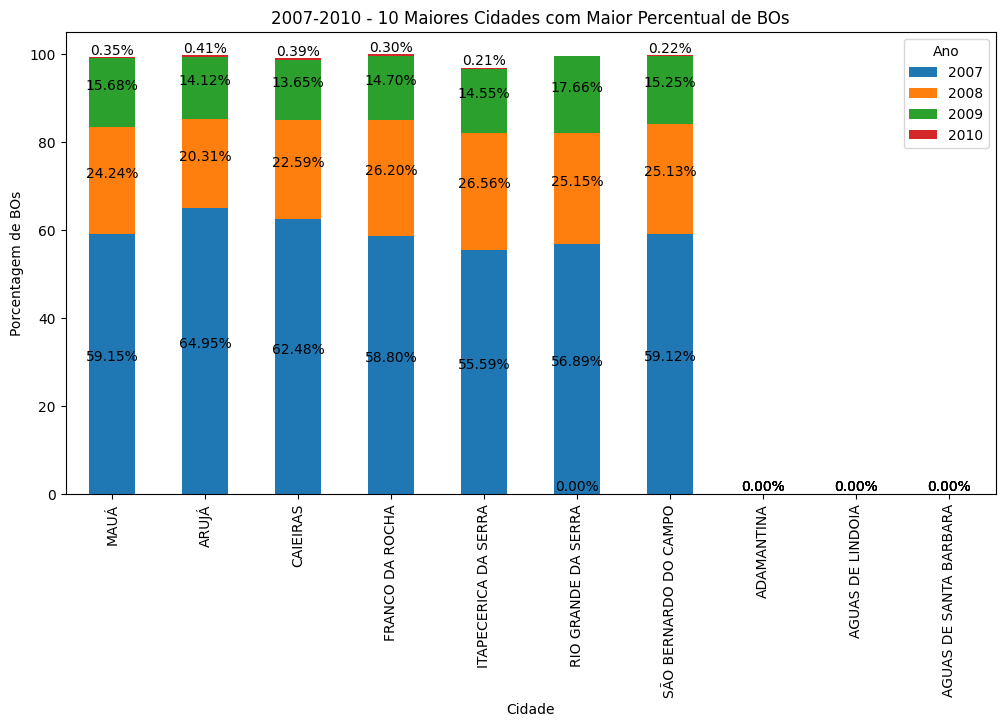

In [ ]:



data_grouped = contagem_bo_por_ano_cidade.groupby(['CIDADE', 'ANO_BO'])['Contagem_BO'].sum().unstack()
data_grouped_percent = data_grouped.div(data_grouped.sum(axis=1), axis=0) * 100

top_10_cidades = data_grouped_percent.sum(axis=1).nlargest(10).index

data_top_10 = data_grouped_percent.loc[top_10_cidades]

def create_stacked_bar_chart(data, title):
    if not data.empty:
        ax = data.plot(kind='bar', stacked=True, figsize=(12, 6))

        ax.set_title(title)
        ax.set_xlabel('Cidade')
        ax.set_ylabel('Porcentagem de BOs')

        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='bottom')

        plt.legend(title='Ano')
        plt.show()

create_stacked_bar_chart(data_top_10[data_top_10.columns[data_top_10.columns.isin(range(2007, 2011))]], '2007-2010 - 10 Maiores Cidades com Maior Percentual de BOs')

#REUNIAO = SEPARAR GRAFICOS
# COlocar grafcos em um subplot com 4 ma1s conhecdos



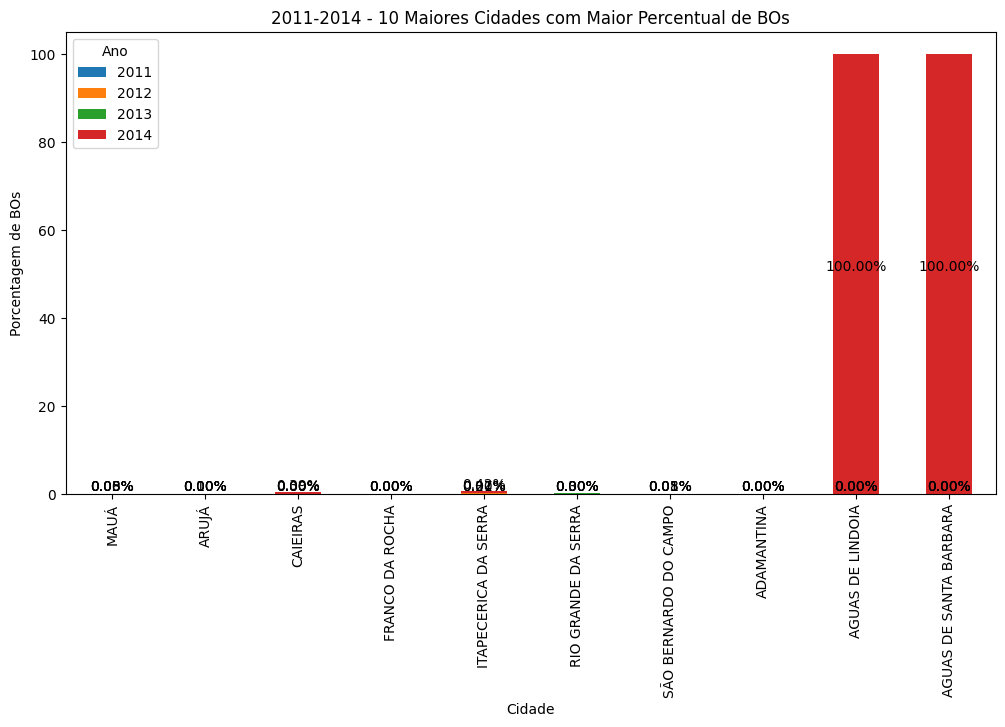

In [ ]:
create_stacked_bar_chart(data_top_10[data_top_10.columns[data_top_10.columns.isin(range(2011, 2015))]], '2011-2014 - 10 Maiores Cidades com Maior Percentual de BOs')

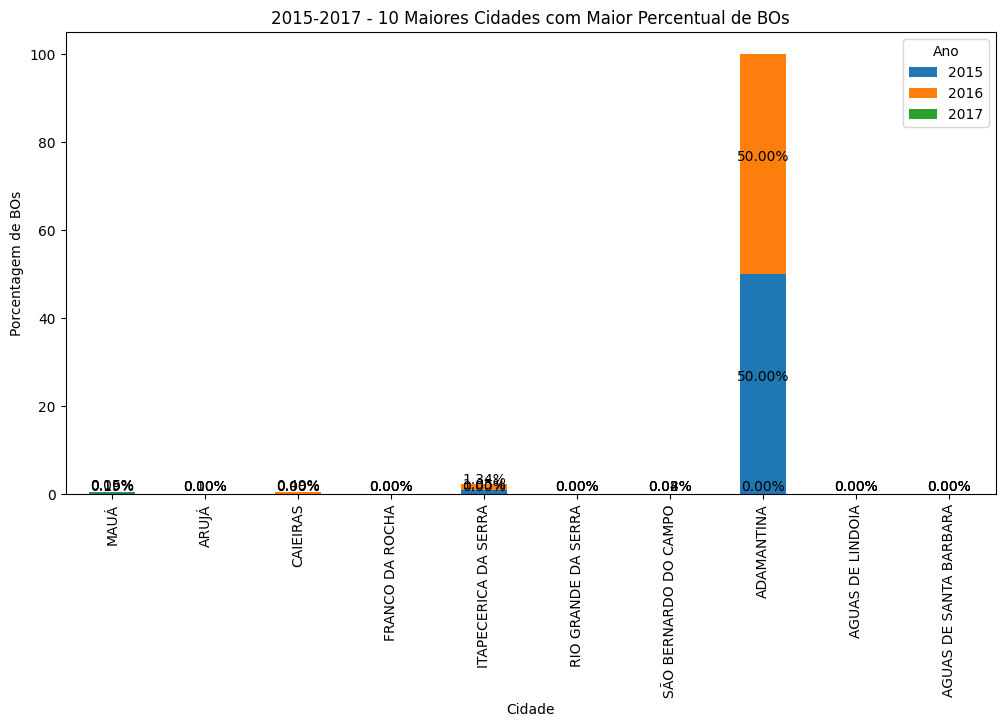

In [ ]:
create_stacked_bar_chart(data_top_10[data_top_10.columns[data_top_10.columns.isin(range(2015, 2018))]], '2015-2017 - 10 Maiores Cidades com Maior Percentual de BOs')


É notório ao analisarmos os gráficos constituídos da quantidade de BO’s por ano que 2009 foi o ano com menor variação de porcentagem de casos de registro, apresentando nas 10 cidades com mais casos uma variação de 31% à 35% de boletins de ocorrência.

Neste viés, podemos constatar que em ordem crescente, os anos de 2015,2016 e 2014 tiveram os maiores índices de registro, chegando ao máximo de 100% de casos registrados em 2014.

Além disto, observa-se que Rio Grande da Serra, Santo André, Taboão da Serra, Barueri, Cajamar, Francisco Morato, Osasco e São Bernardo do Campo tiverem seus registros altos e concentrados entre 2007 à 2010, em contrapartida Águas de Lindóia teve seu auge e concentração em 2014 quando atingiu 100% de registros.


Nesta parte, utilizando as 6 cidades com os maiores quantidades de distribuição de B.O, podemos notar por boxplot a média e fulga de quantidade de casos por cidade

In [ ]:
contagem_bo_por_ano_cidade = dataframe.groupby(['ANO_BO', 'CIDADE']).size().reset_index(name='Contagem_BO')
cidades_maiores = contagem_bo_por_ano_cidade.groupby('CIDADE')['Contagem_BO'].sum().sort_values(ascending=False).head(6).index

data_filtrada = contagem_bo_por_ano_cidade[contagem_bo_por_ano_cidade['CIDADE'].isin(cidades_maiores)]
data_filtrada.loc[:, 'ANO_BO'] = data_filtrada['ANO_BO'].astype(str)


In [ ]:
fig = px.bar(data_filtrada, x="CIDADE", y="Contagem_BO", color="ANO_BO",
            barmode = 'stack', title = "Cidades com maiores registros de BO's")

fig.show()

Dentre as cidades com maiores números de B.O’s se destaca a cidade de são paulo, concentrando o maior número de em todos os anos entre 2008 e 2016, São Bernado do Campo concentrando os casos em 2008 e 2009, juntamente com Diadema e Santo André, Guarulho concentra seus casos em 2007, 2008 e 2009,
Ao compararmos os dados, podemos nos encontrar em uma situação visivelmente delicada, visto que a cidade de São Paulo possui o maior número de riqueza do estado de São Paulo, com PIB de R$$ 714.683,362 ( Setecentos e quatorze milhões, seiscentos e oitenta e três mil, trezentos e sessenta e dois reais), além de Guarulhos com PIB de R$ 61.325,724 (Sessenta e um mil, trezentos e vinte e cinco mil, setecentos e vinte e quatro mil reais), sendo cidades ricas de São Paulo, porém apresentando altos índices de crimes e BO’s, o que pode explicar o incentivo a prática criminalista de furto e roubo principalmente nestas cidades.


In [ ]:
cidades = pd.read_parquet('/content/cidades.parquet')
cidades.head()

,CIDADE,ANO_BO,População_residente
0,DIADEMA,2017,417912
1,GUARULHOS,2017,1352294
2,OSASCO,2017,695245
3,SÃO BERNARDO DO CAMPO,2017,827407
4,SÃO PAULO,2017,12099887


In [ ]:
cidades.loc[:, 'ANO_BO'] = cidades['ANO_BO'].astype(str)
prop_bo = data_filtrada.merge(cidades, on = ['CIDADE',	'ANO_BO'])
prop_bo['prop'] = prop_bo['Contagem_BO']/prop_bo['População_residente']

In [ ]:
dados_sao_paulo = prop_bo[prop_bo['CIDADE'] == 'SÃO PAULO']

# Criando o gráfico de barras não empilhadas por ano
fig = px.bar(dados_sao_paulo, x="ANO_BO", y="prop", color="ANO_BO",
             title="Registros de BO's em SÃO PAULO por ano")
fig.update_layout(barmode='group')  # Define o layout como não empilhado

fig.show()

In [ ]:
fig = px.bar(prop_bo, x="CIDADE", y="prop", color="ANO_BO",
            barmode = 'group', title = "Cidades com maiores registros de BO's (proporção por numero de habitantes)")
fig.update_layout(width=900)
fig.show()
#MUDAR A COR DO GRAF1CO PARA ELE NÃO F1CAR CONFUSO (mudar graf1co se poss1vel)

Podemos observar que abaixo temos uma separação de casos por delegacias específicas.

In [ ]:
dataframe.columns

Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'DATA_OCORRENCIA_BO',
       'HORA_OCORRENCIA_BO', 'FLAG_STATUS', 'RUBRICA', 'CONDUTA', 'LATITUDE',
       'LONGITUDE', 'CIDADE', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'DESCR_TIPO_PESSOA', 'CONT_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'COR', 'DESCR_PROFISSAO', 'DESCR_GRAU_INSTRUCAO', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO_CIRC', 'DESCR_TIPO_BO', 'DESCR_CONDUTA',
       'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'COR_CUTIS', 'DATA_OCORRENCIA',
       'ARTIGO', 'PARAGRAFO'],
      dtype='object')

In [ ]:
contagem_bo_por_ano_delegacia = dataframe.groupby(['ANO_BO', 'DELEGACIA']).size().reset_index(name='Contagem_BO')
contagem_bo_por_ano_delegacia

,ANO_BO,DELEGACIA,Contagem_BO
0,2007,01ª DEL.DEF.MUL. CAMPINAS,1
1,2007,01ª DEL.DEF.MUL. CENTRO,435
2,2007,01º D.P. BARUERI,211
3,2007,01º D.P. CAJAMAR,64
4,2007,01º D.P. CAMPINAS,9
...,...,...,...
1273,2016,47º D.P. CAPAO REDONDO,1
1274,2016,59º D.P. JARDIM DOS IPES,1
1275,2016,DEL.DEF.MUL. BARUERI,1
1276,2016,DEL.POL.ARUJA,1


In [ ]:
# def criar_contagem_bo_por_ano_cidade(data):
#     contagem_bo_por_ano_cidade = data.groupby(['ANO_BO', 'CIDADE']).size().reset_index(name='Contagem_BO')

#     contagem_bo_por_ano_cidade['ANO_BO'] = contagem_bo_por_ano_cidade['ANO_BO'].astype(float)

#     contagem_bo_por_ano_cidade = contagem_bo_por_ano_cidade[contagem_bo_por_ano_cidade['ANO_BO'].apply(lambda x: x.is_integer())]

#     anos_max_bo_por_cidade = contagem_bo_por_ano_cidade.groupby('CIDADE')['Contagem_BO'].idxmax()
#     anos_max_bo_por_cidade = contagem_bo_por_ano_cidade.loc[anos_max_bo_por_cidade]

#     total_bo_por_cidade = contagem_bo_por_ano_cidade.groupby('CIDADE')['Contagem_BO'].transform('sum')
#     anos_max_bo_por_cidade['Percentual'] = (anos_max_bo_por_cidade['Contagem_BO'] / total_bo_por_cidade) * 100

#     return anos_max_bo_por_cidade

# contagem_bo_por_ano_cidade = criar_contagem_bo_por_ano_cidade(dataframe)





In [ ]:
top_10_delegacias = contagem_bo_por_ano_delegacia.groupby("DELEGACIA")["Contagem_BO"].sum().sort_values(ascending= False)[:10].index

In [ ]:
contagem_bo_por_ano_delegacia

,ANO_BO,DELEGACIA,Contagem_BO
0,2007,01ª DEL.DEF.MUL. CAMPINAS,1
1,2007,01ª DEL.DEF.MUL. CENTRO,435
2,2007,01º D.P. BARUERI,211
3,2007,01º D.P. CAJAMAR,64
4,2007,01º D.P. CAMPINAS,9
...,...,...,...
1273,2016,47º D.P. CAPAO REDONDO,1
1274,2016,59º D.P. JARDIM DOS IPES,1
1275,2016,DEL.DEF.MUL. BARUERI,1
1276,2016,DEL.POL.ARUJA,1


In [ ]:
top_10_delegacias_plt = contagem_bo_por_ano_delegacia[contagem_bo_por_ano_delegacia['DELEGACIA'].isin(top_10_delegacias)]
top_10_delegacias_plt.loc[:, 'ANO_BO'] = top_10_delegacias_plt['ANO_BO'].astype(str)

fig = px.bar(top_10_delegacias_plt, x="DELEGACIA", y="Contagem_BO", color="ANO_BO",
            barmode = 'group', title = "Contagem de Boletins de Ocorrência por Delegacia e Ano")

fig.show()

<ipython-input-44-e10ba9f4caa4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# import pandas as pd
# import plotly.graph_objects as go

# anos_2007_2010 = range(2007, 2011)
# anos_2011_2014 = range(2011, 2015)
# anos_2015_2017 = range(2015, 2018)

# data_2007_2010 = data[data['ANO_BO'].isin(anos_2007_2010)]
# data_2011_2014 = data[data['ANO_BO'].isin(anos_2011_2014)]
# data_2015_2017 = data[data['ANO_BO'].isin(anos_2015_2017)]

# contagem_2007_2010 = data_2007_2010['DELEGACIA'].value_counts().reset_index()
# contagem_2011_2014 = data_2011_2014['DELEGACIA'].value_counts().reset_index()
# contagem_2015_2017 = data_2015_2017['DELEGACIA'].value_counts().reset_index()

# contagem_2007_2010.columns = ['DELEGACIA', 'Contagem_2007_2010']
# contagem_2011_2014.columns = ['DELEGACIA', 'Contagem_2011_2014']
# contagem_2015_2017.columns = ['DELEGACIA', 'Contagem_2015_2017']

# contagem_delegacias = contagem_2007_2010.merge(contagem_2011_2014, on='DELEGACIA', how='outer')
# contagem_delegacias = contagem_delegacias.merge(contagem_2015_2017, on='DELEGACIA', how='outer')

# contagem_delegacias = contagem_delegacias.fillna(0)

# contagem_delegacias['Total'] = contagem_delegacias['Contagem_2007_2010'] + contagem_delegacias['Contagem_2011_2014'] + contagem_delegacias['Contagem_2015_2017']

# contagem_delegacias['Percentual'] = (contagem_delegacias['Total'] / contagem_delegacias['Total'].sum()) * 100

# contagem_delegacias = contagem_delegacias.sort_values(by='Percentual', ascending=False).head(10)

# fig = go.Figure()
# for ano in [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]:
#     df = contagem_bo_por_ano_delegacia.copy()
#     df['ANO_BO'] = ano
#     fig.add_trace(
#         go.Bar(x=df['DELEGACIA'], y=df['Contagem_BO'], name=str(ano))
#     )

# fig.update_layout(
#     barmode='relative',
#     title='Delegacias com Maior Percentual de BOs por Ano',
#     xaxis_title='Delegacia',
#     yaxis_title='Percentual',
#     height=400
# )

# fig.show()

# #DELEGAC!A ELETRON!CA E OUTRAS DELEGAC!AS NO ANO







Podemos analizar percentualmente a distribuição dos casos por delegacias, notando a recorrencia a delegacia eletrônica, notando a quantidade virgente que torna a se assemelhar em algumas delegacias

Podemos ver no gráfico abaixo os casos de rubrica por cidade, sendo visíel que a cidade de São Paulo é o epcentro dos casos.

In [ ]:

principais_rubricas = dataframe['RUBRICA'].value_counts().sort_values(ascending=False)[:10].index

contagem_rubricas = dataframe.loc[:, ['RUBRICA', 'CIDADE']]
contagem_rubricas = contagem_rubricas.value_counts().reset_index(name = 'Contagem_RUBRICAS')
contagem_rubricas_plt = contagem_rubricas[contagem_rubricas['RUBRICA'].isin(principais_rubricas)]
contagem_rubricas_plt = contagem_rubricas_plt[contagem_rubricas_plt['CIDADE'].isin(cidades_maiores)]

# # dataframe['RUBRICA'].value_counts()
# contagem_rubricas = dataframe['RUBRICA'].value_counts().reset_index()
# contagem_rubricas.columns = ['RUBRICA', 'Contagem']
# contagem_rubricas['CIDADE'] = dataframe['CIDADE']
# contagem_rubricas.columns

# casos_por_delegacia = contagem_rubricas.groupby(['CIDADE', 'RUBRICA', 'Contagem']).size().reset_index()

fig = px.bar(contagem_rubricas_plt, x='CIDADE', y='Contagem_RUBRICAS', color='RUBRICA',
             title='Quantidade de Casos de Rubricas por Cidade')

fig.show()


## <font color ="#00b8ff"> 4 Quarta Etapa : Exploração dos Dados Categóricos</font>

Explore os dados categóricos do dataset

In [ ]:
count_rub = dataframe['RUBRICA'].value_counts()
count_rub = count_rub.reset_index()
count_rub.columns = ['RUBRICA', 'COUNT']
count_rub.sort_values(inplace = True, by = 'COUNT', ascending = False)

In [ ]:
top_10 = count_rub.loc[:10, :]
fig = px.bar(top_10, x="RUBRICA", y="COUNT", title = "Top 10 Maiores Rubricas registradas")

fig.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


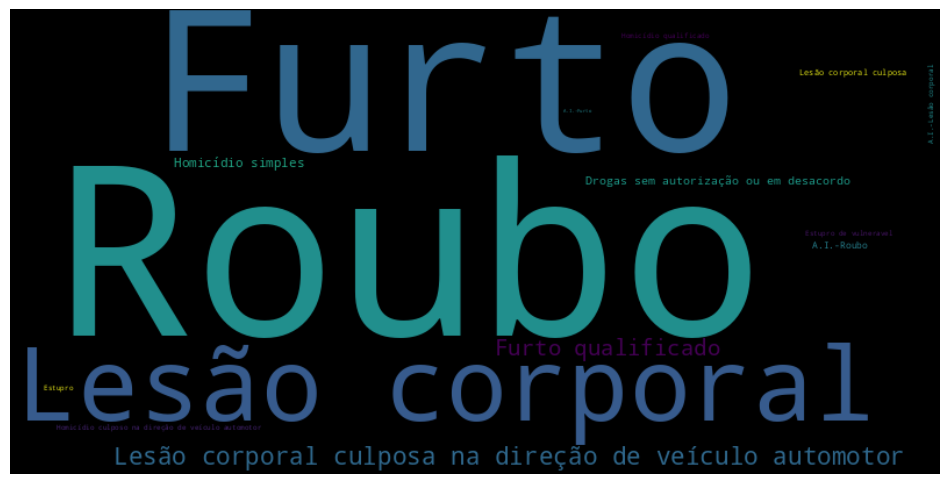

In [ ]:
dict_ = dataframe['RUBRICA'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(dict_)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#mudar cor para preto

In [ ]:
dataframe.columns[:]

Index(['NUM_BO', 'ANO_BO', 'ID_DELEGACIA', 'NOME_DEPARTAMENTO',
       'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC',
       'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'DATA_OCORRENCIA_BO',
       'HORA_OCORRENCIA_BO', 'FLAG_STATUS', 'RUBRICA', 'CONDUTA', 'LATITUDE',
       'LONGITUDE', 'CIDADE', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'DESCR_TIPO_PESSOA', 'CONT_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'COR', 'DESCR_PROFISSAO', 'DESCR_GRAU_INSTRUCAO', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO_CIRC', 'DESCR_TIPO_BO', 'DESCR_CONDUTA',
       'DESCR_TIPOLOCAL', 'DESCR_SUBTIPOLOCAL', 'COR_CUTIS', 'DATA_OCORRENCIA',
       'ARTIGO', 'PARAGRAFO'],
      dtype='object')

In [ ]:
dataframe['DATA_OCORRENCIA'].dt.month

32768      4
32769      6
32770      8
32772      3
32773      3
          ..
4262139    8
4262140    8
4262141    8
4262142    8
4262143    8
Name: DATA_OCORRENCIA, Length: 1144394, dtype: int64

In [ ]:
dataframe.loc[:, 'MES'] = dataframe['DATA_OCORRENCIA'].dt.month
datagrup = dataframe.groupby(['MES', 'ANO_BO']).size().unstack(fill_value=0)

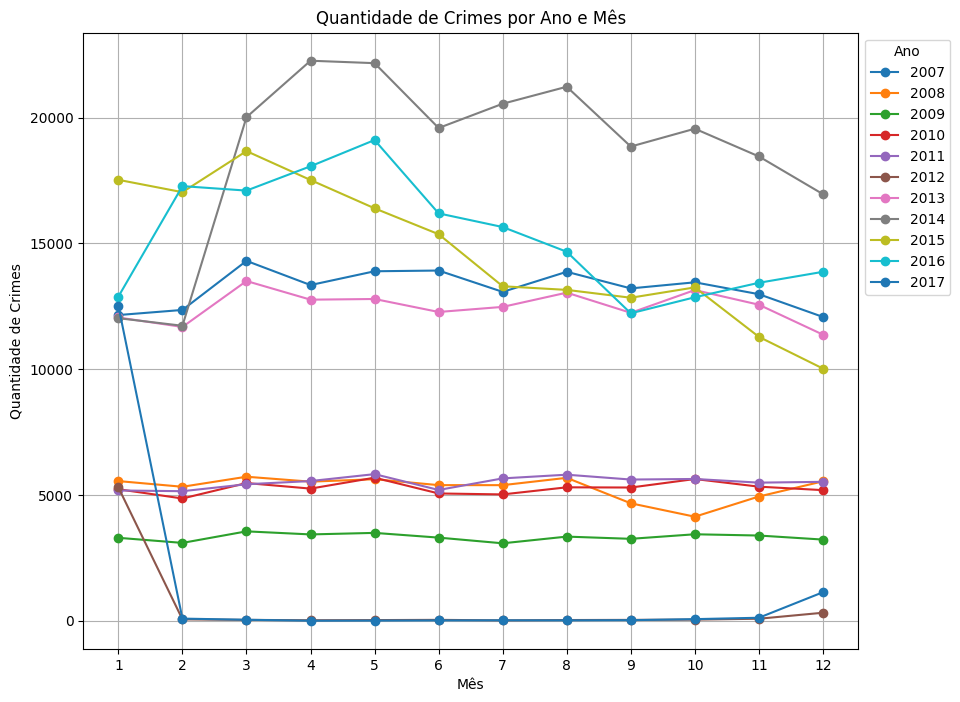

In [ ]:
ax = datagrup.plot(kind='line', marker='o', figsize=(10, 8))
plt.xticks(range(1, 13))
plt.xlabel('Mês')
plt.ylabel('Quantidade de Crimes')
plt.title('Quantidade de Crimes por Ano e Mês')
plt.legend(title='Ano', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()


#Limpeza de dados!

É inequívoca ao analisarmos o gráfico que 2008 foi o ano com maior índice de criminalidade no estado de São Paulo, tendo o seu ápice no mês de Agosto. Contudo, 2017 e 2012 obtiveram nenhum caso perante os meses de fevereiro até setembro, tendo voltado a crescer os casos em outubro dos devidos anos.

Neste sentido, os anos de 2011 obteve o mesmo nível de casos nos meses de setembro, outubro e novembro, tendo uma pequena queda em dezembro. Ao tentarmos, por aproximação, concatenar os casos, nota-se que os anos de 2010,2011 e 2014 tiveram uma aproximação forte entre si, além de em 2009 e 2008 foram os anos com maiores índices de registros de boletim de ocorrência.


In [ ]:
dataframe['DESCR_CONDUTA'].isnull().sum()
dataword = dataframe.dropna(subset=['DESCR_CONDUTA'])[['DESCR_CONDUTA']]

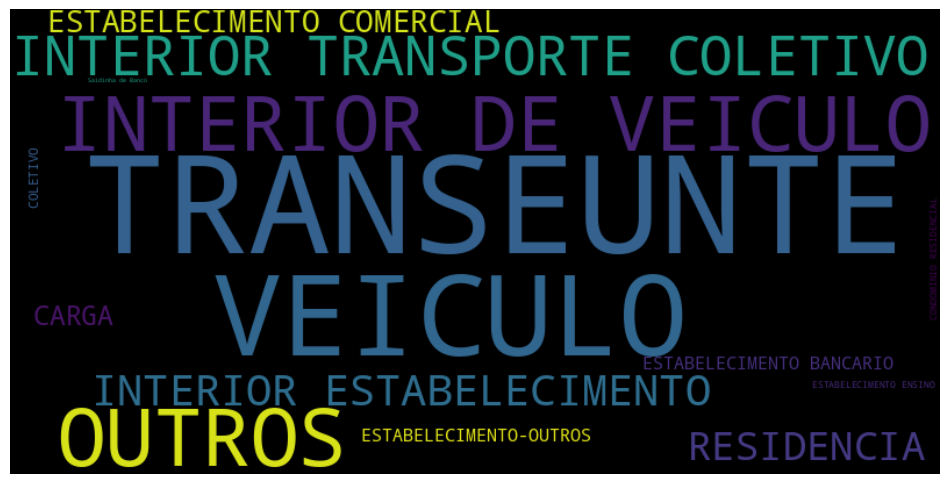

In [ ]:
dict_ = dict(dataword['DESCR_CONDUTA'].value_counts())
wordcloud = WordCloud(width=800, height=400, background_color='black', contour_width=8).generate_from_frequencies(dict_)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()